In [1]:
# Importamos librerias.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importamos el DataFrame.
path = "/content/drive/MyDrive/Skillnest/CORE/ventas_nuevo.csv"
df = pd.read_csv(path)

In [4]:
# Visualizamos nuestro DataFrame.
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Transaction ID              1000 non-null   int64  
 1   Date                        1000 non-null   object 
 2   Customer ID                 1000 non-null   object 
 3   Gender                      1000 non-null   object 
 4   Age                         1000 non-null   int64  
 5   Product Category            1000 non-null   object 
 6   Quantity                    1000 non-null   int64  
 7   Price per Unit              1000 non-null   int64  
 8   Total Amount                1000 non-null   int64  
 9   Ingreso Total Calculado     1000 non-null   int64  
 10  Categoria Venta             1000 non-null   object 
 11  media_por_categoria_genero  1000 non-null   float64
 12  desviacion_vs_Media         1000 non-null   float64
dtypes: float64(2), int64(6), object(5)

In [5]:
# Usamos lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount',
       'ingreso_total_calculado', 'categoria_venta',
       'media_por_categoria_genero', 'desviacion_vs_media'],
      dtype='object')

In [7]:
# Transaction ID revisar valores nulos
df["transaction_id"].isna().sum()

np.int64(0)

In [8]:
# Convertir fechas
df["date"] = pd.to_datetime(df["date"])

In [9]:
df["date"]

,date
0,2023-11-24
1,2023-02-27
2,2023-01-13
3,2023-05-21
4,2023-05-06
...,...
995,2023-05-16
996,2023-11-17
997,2023-10-29
998,2023-12-05


In [10]:
df["date"].isna().sum()

np.int64(0)

In [11]:
# customer_id limpiar espacios
df["customer_id"] = df["customer_id"].str.strip()

In [12]:
df["customer_id"]

,customer_id
0,CUST001
1,CUST002
2,CUST003
3,CUST004
4,CUST005
...,...
995,CUST996
996,CUST997
997,CUST998
998,CUST999


In [13]:
# Revisar valores unicos gender
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
# Valores unico es age
df["age"].unique()

array([34, 26, 50, 37, 30, 45, 46, 63, 52, 23, 35, 22, 64, 42, 19, 27, 47,
       62, 18, 49, 28, 38, 43, 39, 44, 51, 58, 48, 55, 20, 40, 54, 36, 31,
       21, 57, 25, 56, 29, 61, 32, 41, 59, 60, 33, 53, 24])

In [15]:
# Revisar valores unicos product_category
df["product_category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [16]:
# Revisar valores unicos categoria_venta
df["categoria_venta"].unique()

array(['Media', 'Alta', 'Baja'], dtype=object)

In [17]:
# Revisar duplicados.
df.duplicated().sum()

np.int64(0)

In [18]:
# Ver estadísticas básicas
df.describe().T

,count,mean,min,25%,50%,75%,max,std
transaction_id,1000.0,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
date,1000,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
age,1000.0,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
quantity,1000.0,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
price_per_unit,1000.0,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
total_amount,1000.0,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632
ingreso_total_calculado,1000.0,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632
media_por_categoria_genero,1000.0,456.0,419.80226,450.783133,451.382353,467.097701,487.12766,20.398248
desviacion_vs_media,1000.0,0.00139,-462.13,-390.78,-317.1,432.9,1580.2,559.625999


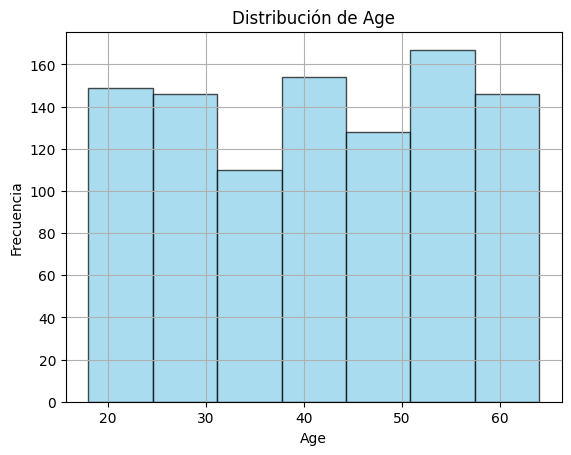

In [19]:
# Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

# Histograma variable age

plt.hist(df["age"], bins=7, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Distribución de Age")
plt.xlabel("Age")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

En el histograma se puede ver que la mayor concentracion de datos esta entre los 40 y 60 años, entre 50 y 60 años hay sobre 160 datos.

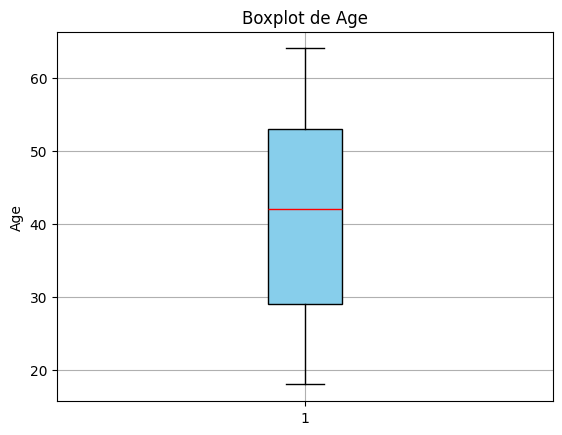

In [20]:
# Boxplot variable age
plt.boxplot(
    df["age"],
    notch=False,
    patch_artist=True,
    boxprops=dict(facecolor="skyblue"),
    medianprops=dict(color="red")
)
plt.title("Boxplot de Age")
plt.ylabel("Age")
plt.grid(True)
plt.show()

En el boxplot se muestra que la mediana es de aproximadamente 42 años, y la mayor concentracion de datos esta entre 29 y 52 años. No se aprecian valores atípicos.

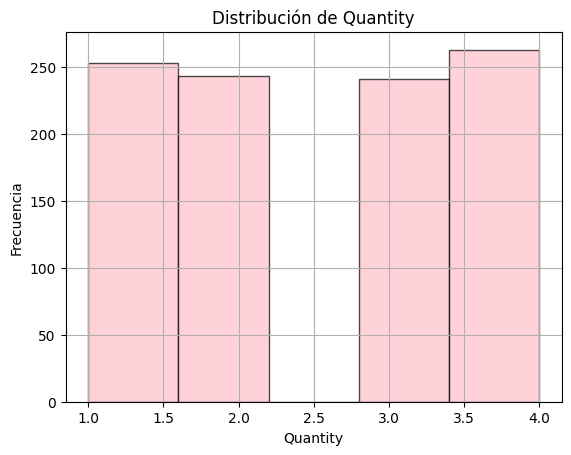

In [21]:
# Histograma variable quantity
plt.hist(df["quantity"], bins=5, color="pink", edgecolor="black", alpha=0.7)
plt.title("Distribución de Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

El histograma muestra que la mayor cantidad esta entre 3.5 y 4.0, en donde la frecuencia es sobre 250.

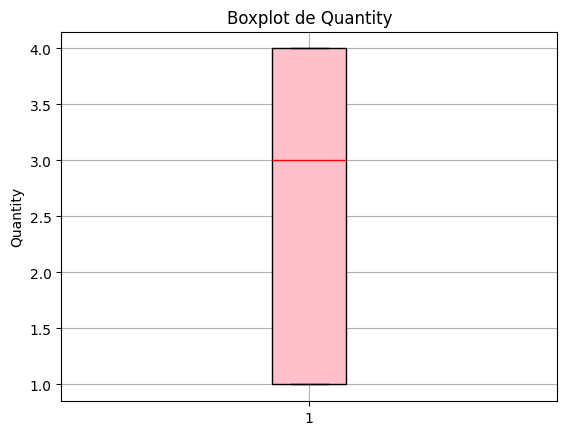

In [22]:
# Boxplot variable quantity
plt.boxplot(
    df["quantity"],
    notch=False,
    patch_artist=True,
    boxprops=dict(facecolor="pink"),
    medianprops=dict(color="red")
)
plt.title("Boxplot de Quantity")
plt.ylabel("Quantity")
plt.grid(True)
plt.show()

el boxplot muestra que la mediana esta en 3 y que la concentracion de datos esta entre 1.0 y 4.0, no se ven valores atípicos.

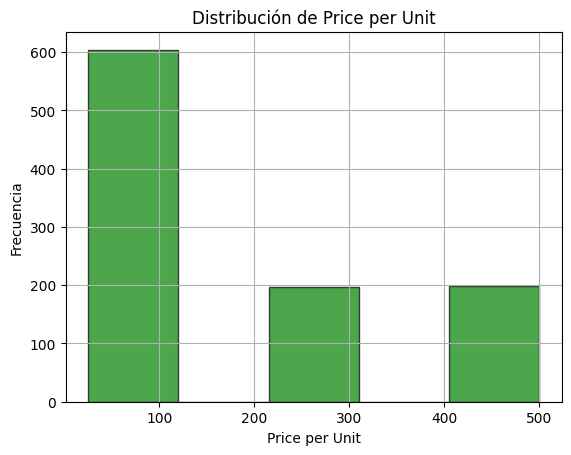

In [23]:
# Histograma variable price_per_unit
plt.hist(df["price_per_unit"], bins=5, color="green", edgecolor="black", alpha=0.7)
plt.title("Distribución de Price per Unit")
plt.xlabel("Price per Unit")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

el histograma muestra el precio por unidad de 100 tiene la mayor concentracion, casi sobre lo 600 datos.

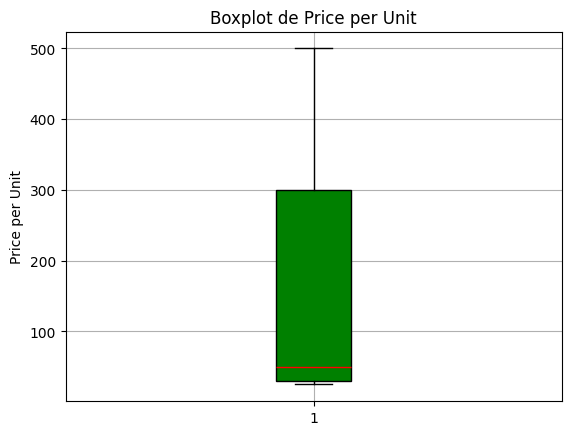

In [24]:
# Boxplot variable price_per_unit
plt.boxplot(
    df["price_per_unit"],
    notch=False,
    patch_artist=True,
    boxprops=dict(facecolor="green"),
    medianprops=dict(color="red")
)
plt.title("Boxplot de Price per Unit")
plt.ylabel("Price per Unit")
plt.grid(True)
plt.show()

el boxplot muestra que la mediana esta aproximadamente en 50 y la concentracion de datos esta entre 50 y 300. no se ven valores atípicos.

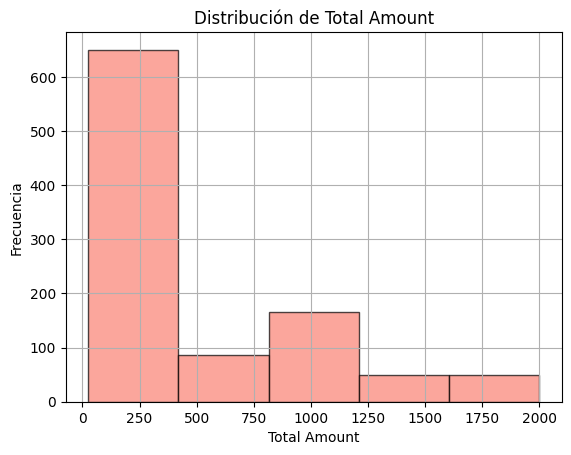

In [25]:
# Histograma variable total_amount
plt.hist(df["total_amount"], bins=5, color="salmon", edgecolor="black", alpha=0.7)
plt.title("Distribución de Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

el histograma muestra que la cantidad total de 250 con una frecuencia alta de sobre 600.

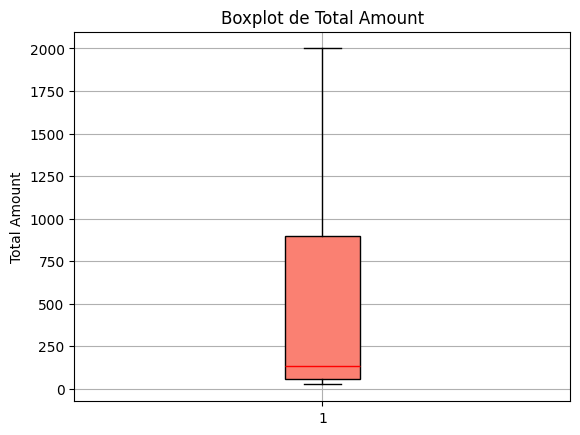

In [26]:
# Boxplot variable total_amount
plt.boxplot(
    df["total_amount"],
    notch=False,
    patch_artist=True,
    boxprops=dict(facecolor="salmon"),
    medianprops=dict(color="red")
)
plt.title("Boxplot de Total Amount")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

El boxplot muestra que la mediana esta aproximadamente por 200, y la concentracion de datos esta entre 150 y 900 aproximadamente.

In [27]:
# Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

# Agrupar las ventas por fechas
ventas_por_fecha = df.groupby("date")["total_amount"].sum().reset_index()

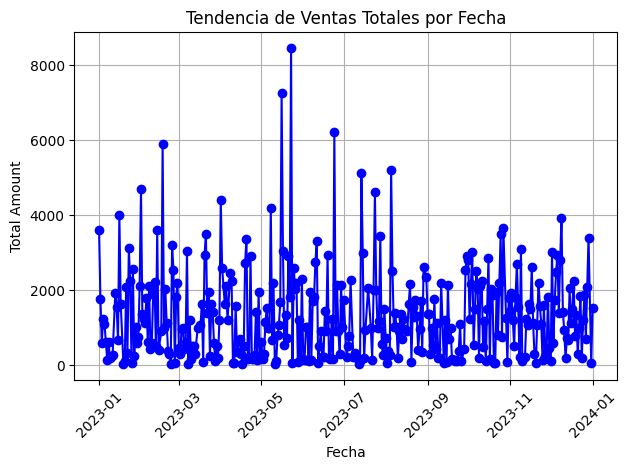

In [28]:
# Gráfico de lineas de ventas por fecha
plt.plot(ventas_por_fecha["date"], ventas_por_fecha["total_amount"], marker="o", color="blue")
plt.title("Tendencia de Ventas Totales por Fecha")
plt.xlabel("Fecha")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico de líneas muestra que durante un año, desde 2023 al 2024 se realizaron compras, en donde en el mes de mayo hubo una que supero los 8000.

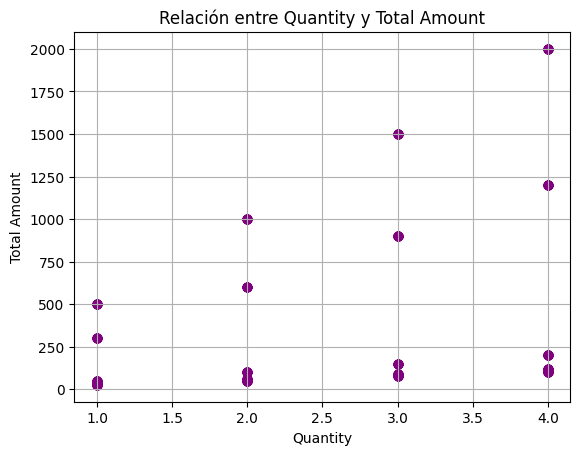

In [29]:
# Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

# Gráfico 1 quantity vs total_amount
plt.scatter(df["quantity"], df["total_amount"], alpha=0.7, color="purple")
plt.title("Relación entre Quantity y Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

en el gráfico de dispersión se muestra una relación entre la cantidad y el total a una mayor cantidad evidenetemente hay un mayor total.

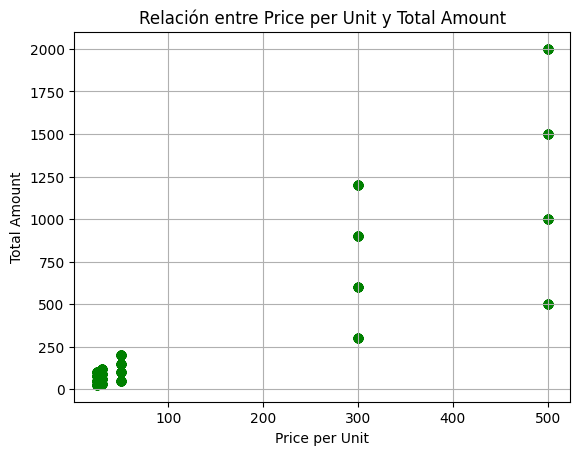

In [30]:
# Gráfico 2 price_per_unit vs total_amount
plt.scatter(df["price_per_unit"], df["total_amount"], alpha=0.7, color="green")
plt.title("Relación entre Price per Unit y Total Amount")
plt.xlabel("Price per Unit")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

en el gráfico de dispersión se muestra una relación entre el precio por unidad y el total, a mayor precio mayor total.

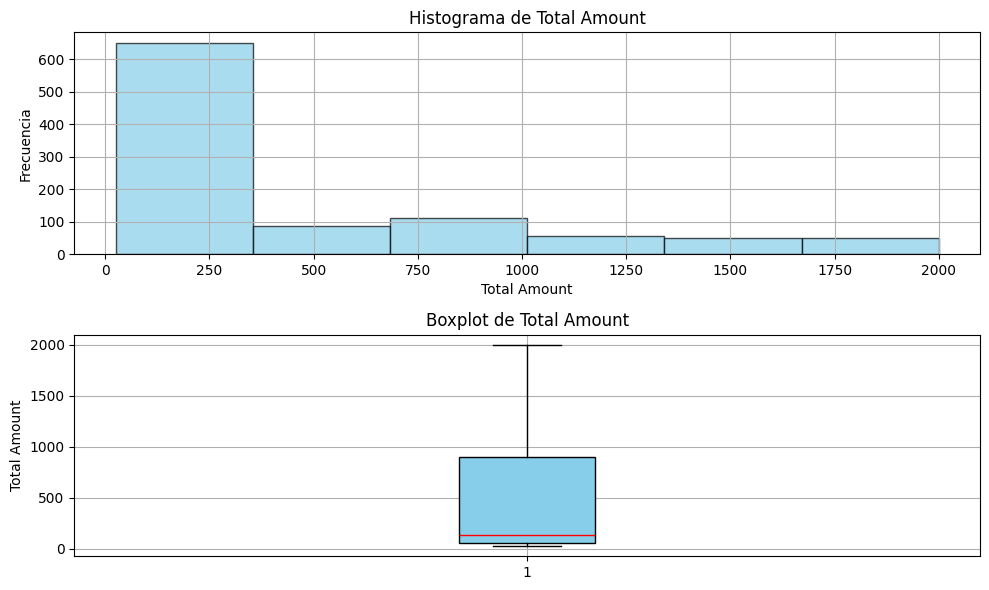

In [31]:
# Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

plt.figure(figsize=(10,6))

# Subplot 1: Histograma
plt.subplot(2,1,1)
plt.hist(df["total_amount"], bins=6, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histograma de Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frecuencia")
plt.grid(True)

# Subplot 2: Boxplot
plt.subplot(2,1,2)
plt.boxplot(
    df["total_amount"],
    notch=False,
    patch_artist=True,
    boxprops=dict(facecolor="skyblue"),
    medianprops=dict(color="red")
)
plt.title("Boxplot de Total Amount")
plt.ylabel("Total Amount")
plt.grid(True)

plt.tight_layout()
plt.show()

a modo general y analizando el total, en el histograma se aprecia que la mayor concentracion esta entre 0 y 300, con una frecuencia sobre los 600.
mientras que en el boxplot, se ve que la mediana esta aproximadamente en 200 y que la concentracion de datos esta entre 0 y 900.